In [30]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
import math
import seaborn as sns
sns.set_theme()

# Teleportation

[Quantum Teleportation](https://en.wikipedia.org/wiki/Quantum_teleportation)

Es pasar de un estado a otro estado. Por ejemplo si quiero pasar un qubito en $q_0$ a $q_2$ realizamos una teleportaciín

- No clone theorem.
- No es posible clonar estados cúanticos, debido a que no concemos el estado antes de medirlo, al medirlo es que perdemos la información del qubit como tal. Es decir no pdoemos hacer un ocpiar y pegar d eun estado a otro.

Un estado desconocido lo podemos definir en el $q_0$,un estado con alfa probabilidad ket 0, beta probabiliad ket 1:

"Alice"
$$\ket{\Psi}= \alpha\ket{0} + \beta\ket{1}$$

Por ejemplo, si tenemos un sistema de 3 qubits de la siguiente manera:


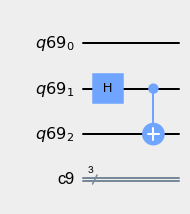

In [31]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.h(1)
qc.cnot(1,2)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

Sabemos que el estado para $q_1 y q_2$  es de la forma, superpuesta-entrelazada:

"Bob"
$$\frac{1}{\sqrt{2}}(\ket{00} +\ket{11})$$

El estado cuántico total resulta del producto tensorial entre  ambos estados.

$$\ket{\Psi}= \alpha\ket{0} + \beta\ket{1} \otimes \frac{1}{\sqrt{2}}(\ket{00} +\ket{11})$$
$$\frac{1}{\sqrt{2}}[\alpha\ket{000}+\alpha\ket{011} +\beta\ket{100}+\beta\ket{111}]$$

Al aplicar una compuerta CNOT en un $q_1$ creamos una especie de "clon", en el cual sucede una inversión de los bits. 

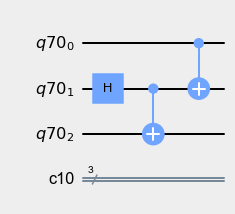

In [32]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.h(1)
qc.cnot(1,2)
qc.cnot(0,1)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

Matemáticamente nuestro qbit estado total cuántico ahora se vería así:
$$\frac{1}{\sqrt{2}}[\alpha\ket{000}+\alpha\ket{011} +\color{blue}\beta\ket{100}\color{blue}\beta+\ket{111}]$$

$$\frac{1}{\sqrt{2}}[\alpha\ket{000}+\alpha\ket{011} +\color{red}\beta\ket{101}\color{red}+\color{red}\beta\ket{110}]$$

Al aplicar una compuerta de **Hadamard** al estado que teníamos en nuestro circuito se ve así:

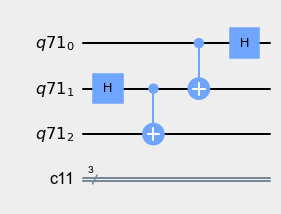

In [33]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.h(1)
qc.cnot(1,2)
qc.cnot(0,1)
qc.h(0)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

Desde Alice tenemos esta información, ahora nuestro estado cuántico total está dado por la la operación:

$$\frac{1}{\sqrt{2}}[\alpha\ket{000}+\alpha\ket{011} +  \alpha\ket{100}+\alpha\ket{111} +\beta\ket{001}+\beta\ket{010} - \beta\ket{101} - \beta\ket{110}]$$

Lo interesante de la expresión anterior es que las posibilidades aumentan. Es decir este estado cuántico es de utilidad en el sentido de que solo le basta una transformación adicional que hace Bob para obtener los siguientes resultados por ejemplo:

Para los $q_0$ y $q_1$ tenemos qué:

- $\ket{00}$
- $\ket{01}$
- $\ket{10}$
- $\ket{11}$

Mientras que para $q_2$

Tenemos que cada una de las siguientes compuertas darían valores esperado.

I GATE
- $\ket{00}$ --> $\alpha\ket{0}+\beta\ket{1}$

X GATE
- $\ket{01}$ --> $\alpha\ket{1}+\beta\ket{0}$
  
Z GATE
- $\ket{10}$ Z --> $\alpha\ket{0} -\beta\ket{1}$

XZ GATE
- $\ket{11}$ XZ --> $\alpha\ket{1} -\beta\ket{0}$


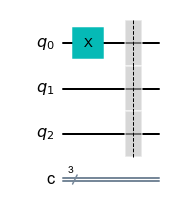

In [34]:
# Bucamos teleportar el qubito 0 al q2
circuit = QuantumCircuit(3,3)
circuit.x(0)
circuit.barrier() # Para separar operaciones visualmente
circuit.draw(output='mpl')


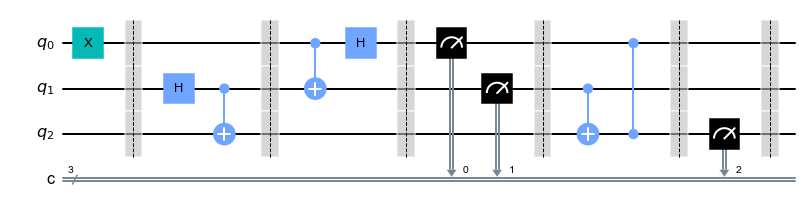

In [35]:
# Entaglement
circuit.h(1)
circuit.cx(1,2)
circuit.barrier() # Para separar operaciones visualmente

# Close Hadamard
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()

# Measure

circuit.measure([0,1],[0,1])
circuit.barrier()
# Z gate

circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()

# Measure
circuit.measure([2],[2])
circuit.barrier()

circuit.draw(output='mpl')

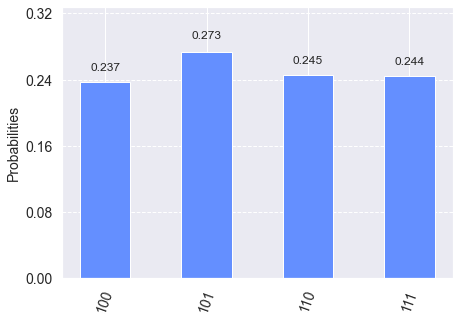

In [36]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(result.get_counts(circuit))

En los resultados que podemos observar tenemos que el $\ket{100} o \ket{q_2q_1q_0}$ en Qiskit, para el q2, todos neustros valores fueron 1, que era el objetivo inicial para teleportar información cuántica desde $q_0$ a $q_2$